<a href="https://colab.research.google.com/github/MarekSroka/Bank_Deposits/blob/main/Bank_deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TREŚĆ ZADANIA**

W pliku Bank Marketing data.csv znajdują się dane charakteryzujące klientów pewnego banku oraz kampanie marketingowe skierowane do tych klientów. Dołączone są ponadto wskaźniki społeczne i ekonomiczne. Na podstawie tych danych należy zbudować model prognozujący szansę, że klient w wyniku prowadzonej kampanii założy lokatę terminową. Szczegółowy opis danych znajduje się w pliku Description.txt (opis jest w języku angielskim). Proszę się z nim zapoznać, gdyż zawiera ważne z punktu widzenia modelowania informacje.
Proszę o przesłanie raportu w którym opisana zostanie budowa modelu. Proszę zawrzeć w raporcie opis poszczególnych kroków prowadzących do powstania modelu.
Format pliku: pdf, word
Język raportu: polski lub angielski (nie ma to znaczenia dla oceny)

Title: Bank Marketing data (with social/economic context)

2. Time range: from May 2008 to November 2010

3. Attribute information:

   Input variables:
   # Bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   # Related with the last contact of the current campaign:

   8 - contact: contact communication type (categorical: "cellular","telephone")

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   # Other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

   # Social and economic context attributes

  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)
     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


4. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label.


5. The goal is to assess the probability that the client will subscribe a bank term deposit (variable y).

# Import and install libraries \ notebook settings

In [162]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [161]:
!pip install sweetviz
!pip install dtale
!pip install plotly
!pip install ppscore

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

from google.colab import data_table
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import confusion_matrix
# from sklearn. metrics import classification_report
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from xgboost import XGBClassifier
# # from sklearn.dummy import DummyClassifier
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV

# installed libraries
import sweetviz as sw
import dtale
import dtale.app as dtale_app
import plotly.graph_objs as go
import ppscore as pps


In [164]:
pd.set_option('display.max_columns', None)
data_table.enable_dataframe_formatter()

# Functions

In [165]:
# def col_checker(df):
#     print(df.info())
#     print(df.describe())
#     col = list(df.columns)
#     print('Columns list:\n', col)
#     for c in col:
#         print('\n', '-->column name:', c,'\n')
#         print(df[c].value_counts(normalize=True))
#         print('\n Number of nulls:', df[c].isna().sum())

# Loading data

In [166]:
df = pd.read_csv('/content/gdrive/MyDrive/000.Projekt_KRD/Bank Marketing data.csv', delimiter=';', na_values=['unknown'])

# EDA


### Sweetviz library for EDA

In [167]:
# analyse_report = sw.analyze(df)

In [168]:
# analyse_report.show_html('df_start.html', open_browser=True)

In [169]:
# current_datetime = str(datetime.now().strftime("%Y_%m_%d_%H%M"))
# raport = analyse_report.show_html('total_df_' + current_datetime +'.html', open_browser=True)

### dtale library for EDA

In [170]:
dtale_app.USE_COLAB = True
dtale.show(df)

https://i8ntmygi22r-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [171]:
dtale.instances()
# dtale.get_instance(1).kill()

To gain access to an instance object simply pass the value from 'ID' to dtale.get_instance(ID)

ID Name                                                                                 URL
 1      https://i8ntmygi22r-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1
        https://i8ntmygi22r-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1


## Basic information and statistics

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [173]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [174]:
#ilość wierszy z wartością null w DF
df.isnull().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

##Columns Review

In [175]:
# age

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['age'])][['age']]
chart, labels = np.histogram(s['age'], bins=15)

kde = sts.gaussian_kde(s['age'])
kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
# main statistics
stats = df['age'].describe().to_frame().T
charts = [
	go.Bar(x=labels[1:], y=chart, name='Histogram'),
	go.Scatter(
		x=list(range(len(kde_data))), y=kde_data, name='KDE',		yaxis='y2', xaxis='x2',		line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'age Histogram (bins: 25) w/ KDE'},
    'xaxis2': {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
    'yaxis': {'side': 'left', 'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'KDE'}}
}))


figure.show()

In [176]:
#transform month and day of week into categorical data

month_order = ['jan', 'feb', 'mar', "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

day_order = ["mon","tue","wed","thu","fri"]

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

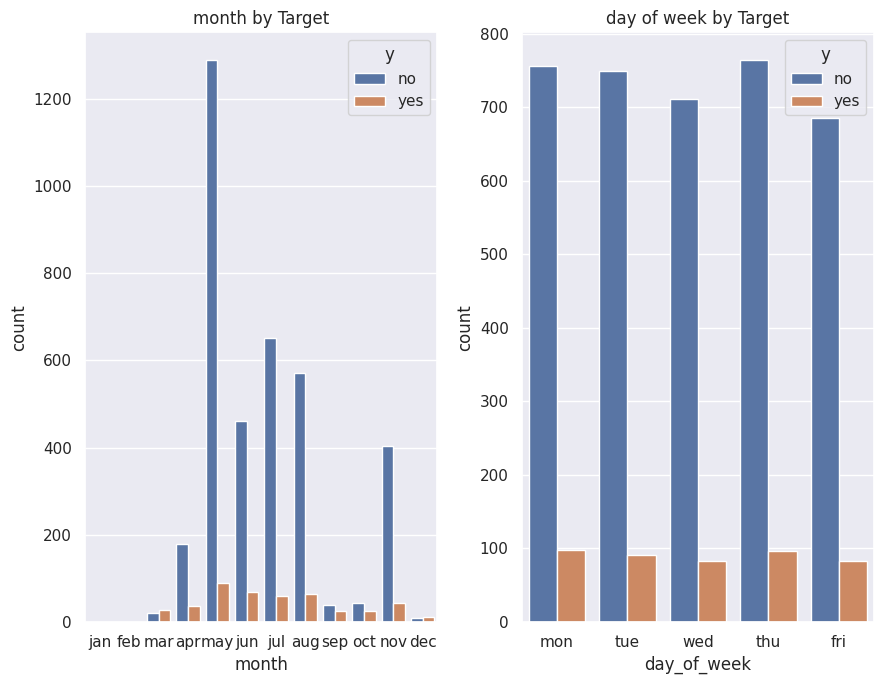

In [177]:
plt.figure(figsize=(9, 7))
plt.subplot(1, 2, 1)

sns.countplot(x='month', hue='y', data=df)
plt.title('month by Target')

plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', hue='y', data=df)
plt.title('day of week by Target')

plt.tight_layout()
plt.show()

In [178]:
# groupby month, day of week with target variable

df_agg = df.groupby(['month', 'day_of_week', 'y']).size().reset_index(name='count')

In [179]:
df_agg.head()

,month,day_of_week,y,count
0,jan,mon,no,0
1,jan,mon,yes,0
2,jan,tue,no,0
3,jan,tue,yes,0
4,jan,wed,no,0


In [180]:
import plotly.graph_objects as go

fig = go.Figure()

for day in df_agg['day_of_week'].unique():
    data = df_agg[df_agg['day_of_week'] == day]
    fig.add_trace(go.Bar(x=data['month'], y=data['count'], name=day))

fig.update_layout(
    barmode='group',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Count'),
    title='Grouped Bar Chart of Month and Day of Week vs. Target (y)'
)

fig.show()

Duration column -

In [181]:
print(df.groupby('y')['duration'].describe())

      count       mean         std   min    25%    50%    75%     max
y                                                                    
no   3668.0  219.40976  198.256347   0.0   96.0  165.0  274.0  3253.0
yes   451.0  560.78714  411.537717  63.0  255.5  458.0  761.0  3643.0


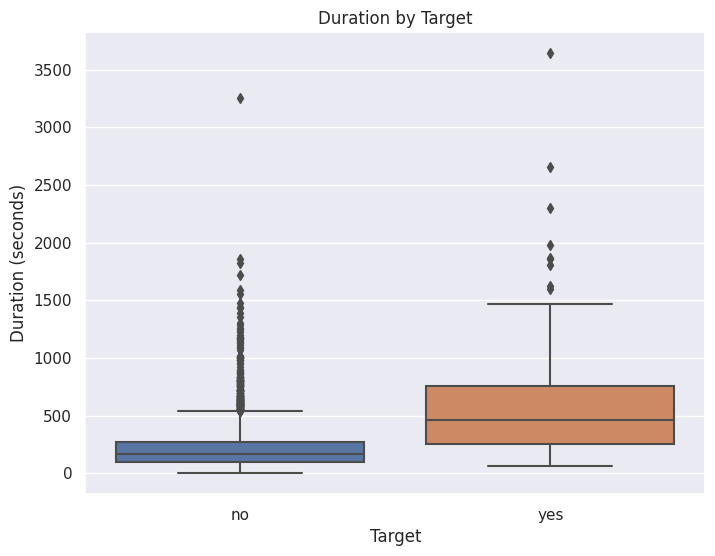

In [182]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duration by Target')
plt.xlabel('Target')
plt.ylabel('Duration (seconds)')
plt.show()

In [183]:
from scipy import stats

# t-test to check if there's a significant difference between 'yes' and 'no'
duration_yes = df[df['y'] == 'yes']['duration']
duration_no = df[df['y'] == 'no']['duration']
t_stat, p_value = stats.ttest_ind(duration_yes, duration_no)

print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check the significance level (usually 0.05)
alpha = 0.05
print("There is a significant difference between 'yes' and ' no' groups.") if p_value < alpha else print("There is no significant difference between 'yes' and 'no' groups.")

T-test statistic: 29.57185726364515
P-value: 1.902622447564083e-174
There is a significant difference between 'yes' and ' no' groups.


In [184]:
import pandas as pd
from scipy.stats import chi2_contingency

# Automatically create duration bins and labels based on quantiles
num_bins = 15 # You can adjust the number of bins as needed
df['duration_category'] = pd.qcut(df['duration'], q=num_bins, labels=False)

# Perform the chi-squared test
contingency_table = pd.crosstab(df['y'], df['duration_category'])
chi2, p, _, _= chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2}')
print(f'P-value: {p}')

# Check the significance level (usually 0.05)
alpha = 0.05
print("There is a significant relationship between 'y' and 'duration_category'.") if p < alpha else print("There is no significant relationship between 'y' and 'duration_category'.")

Chi-squared statistic: 756.2861115320213
P-value: 2.4552136367227164e-152
There is a significant relationship between 'y' and 'duration_category'.


In [185]:
# cancel the duration column after benchmarking !!!

Campaign column

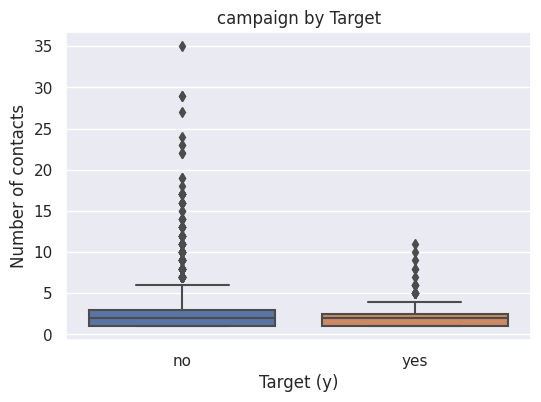

In [186]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='campaign', data=df)
plt.title(f'campaign by Target')
plt.xlabel('Target (y)')
plt.ylabel('Number of contacts')
plt.show()

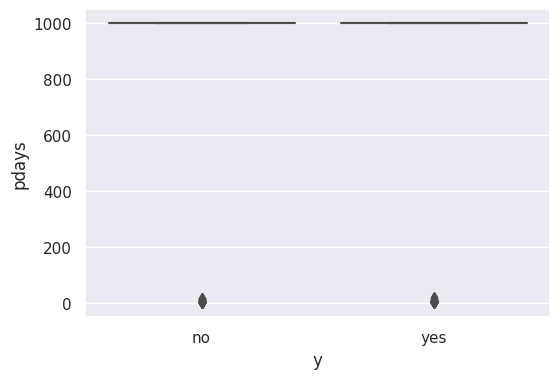

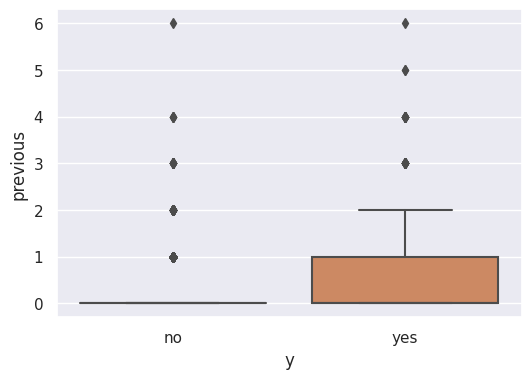

In [187]:
num_feat_01 = ['pdays', 'previous']

for f in num_feat_01:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df['y'], y=df[f])
  plt.show()

In [188]:
df.month.value_counts()

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
jan       0
feb       0
Name: month, dtype: int64

In [189]:
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0}).astype('int')
df['month_numeric'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov':11, 'dec': 12 }).astype('int')

In [190]:
df['month_numeric']

0        5
1        5
2        6
3        6
4       11
        ..
4114     7
4115     7
4116     5
4117     8
4118    11
Name: month_numeric, Length: 4119, dtype: int64

## Pairplot - financial coeff

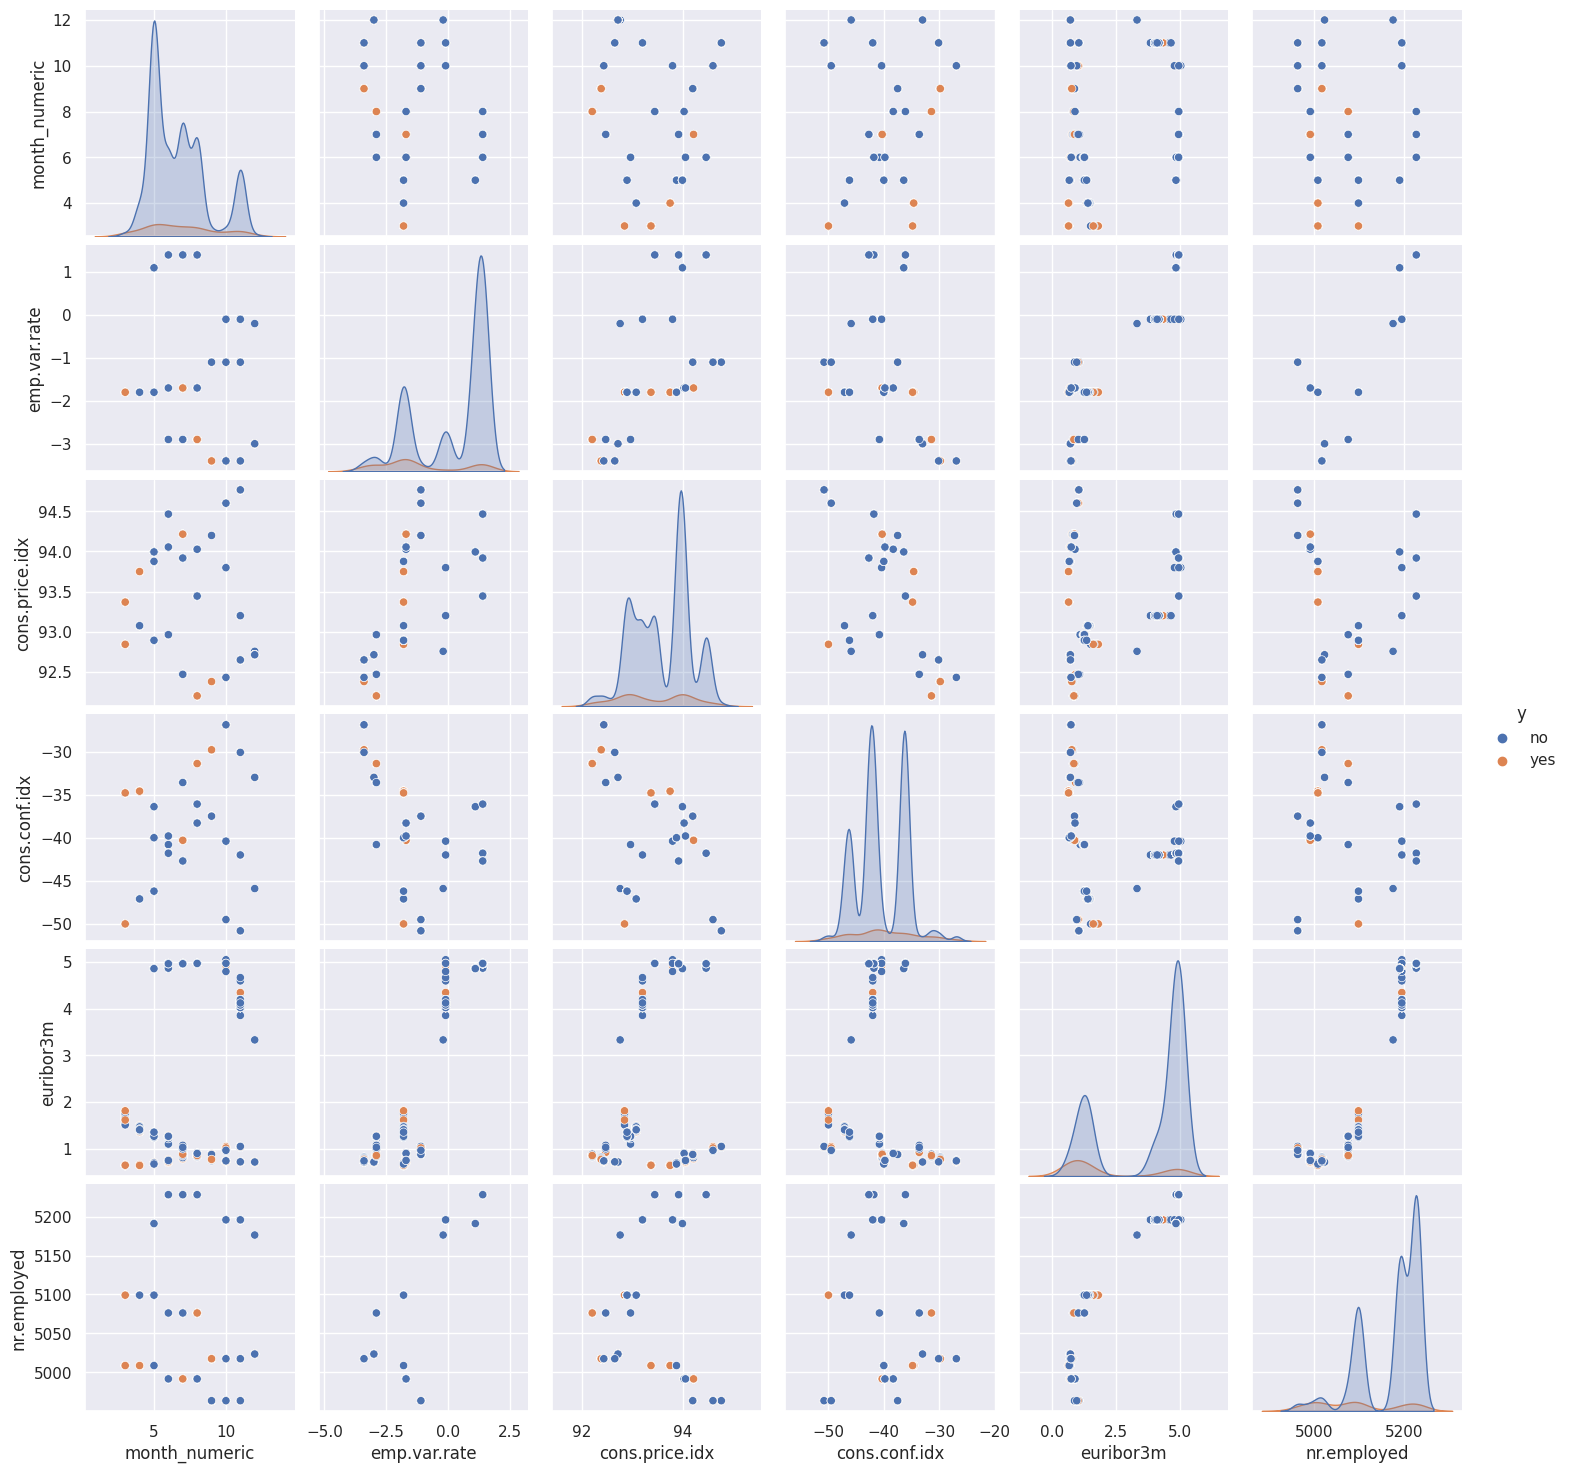

In [191]:
sns.set(rc={"figure.figsize":(32, 12)})

data_coeffs = ['month_numeric', 'emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

sns.pairplot(df[data_coeffs], hue="y")

plt.show()

## Relacje pomiędzy zmiennymi w Data Frame

### Wartości numeryczne między sobą

In [192]:
numerical_features=[col for col in df.select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
print(numerical_features)
print(len(numerical_features))
print(type(numerical_features))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'duration_category', 'month_numeric']
12
<class 'list'>


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'duration'),
  Text(2.5, 0, 'campaign'),
  Text(3.5, 0, 'pdays'),
  Text(4.5, 0, 'previous'),
  Text(5.5, 0, 'emp.var.rate'),
  Text(6.5, 0, 'cons.price.idx'),
  Text(7.5, 0, 'cons.conf.idx'),
  Text(8.5, 0, 'euribor3m'),
  Text(9.5, 0, 'nr.employed'),
  Text(10.5, 0, 'duration_category'),
  Text(11.5, 0, 'month_numeric')])

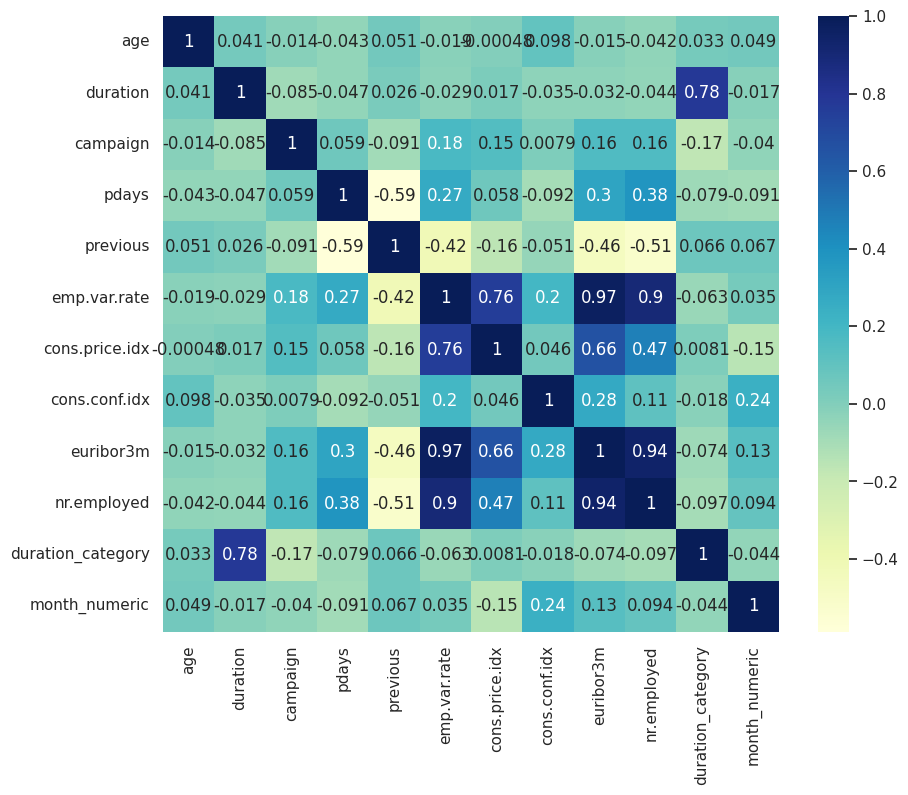

In [193]:
correlations=df[numerical_features].corr()
plt.figure(figsize=(10,8))

sns.heatmap(data=correlations,square=True,annot = True, cmap="YlGnBu")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [194]:
# Calculate and display PPS scores for all pairs of numeric variables
for var1 in numerical_features:
    for var2 in numerical_features:
        if var1 != var2:
            pps_score = pps.score(df, var1, var2)['ppscore']
            print(f'PPS Score between {var1} and {var2}: {pps_score:.2f}')

PPS Score between age and duration: 0.00
PPS Score between age and campaign: 0.00
PPS Score between age and pdays: 0.00
PPS Score between age and previous: 0.00
PPS Score between age and emp.var.rate: 0.00
PPS Score between age and cons.price.idx: 0.00
PPS Score between age and cons.conf.idx: 0.00
PPS Score between age and euribor3m: 0.00
PPS Score between age and nr.employed: 0.00
PPS Score between age and duration_category: 0.00
PPS Score between age and month_numeric: 0.00
PPS Score between duration and age: 0.00
PPS Score between duration and campaign: 0.00
PPS Score between duration and pdays: 0.00
PPS Score between duration and previous: 0.00
PPS Score between duration and emp.var.rate: 0.00
PPS Score between duration and cons.price.idx: 0.00
PPS Score between duration and cons.conf.idx: 0.00
PPS Score between duration and euribor3m: 0.00
PPS Score between duration and nr.employed: 0.00
PPS Score between duration and duration_category: 1.00
PPS Score between duration and month_nu

### Wartości numeryczne vs target column

In [195]:
df_copy = df.copy()

In [196]:
df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,y_numeric,month_numeric
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,0,5
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,0,5
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,0,6
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0,6
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0,11


In [197]:
y_numeric = df_copy.pop('y_numeric')

In [198]:
X = df_copy
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,month_numeric
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,5
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,5
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,6
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,6
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,11


In [199]:
X[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4119 non-null   int64  
 1   duration           4119 non-null   int64  
 2   campaign           4119 non-null   int64  
 3   pdays              4119 non-null   int64  
 4   previous           4119 non-null   int64  
 5   emp.var.rate       4119 non-null   float64
 6   cons.price.idx     4119 non-null   float64
 7   cons.conf.idx      4119 non-null   float64
 8   euribor3m          4119 non-null   float64
 9   nr.employed        4119 non-null   float64
 10  duration_category  4119 non-null   int64  
 11  month_numeric      4119 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 386.3 KB


In [200]:
y_numeric.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: y_numeric
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


In [201]:
# sprawdzenie korelacji między zmiennymi numerycznymi a targetem ('y_numeric')
for f in numerical_features:
  print(f'\nFeature: {f}')
  print(stats.pointbiserialr(X[f], y_numeric))


Feature: age
SignificanceResult(statistic=0.060374082506977636, pvalue=0.00010569353749626029)

Feature: duration
SignificanceResult(statistic=0.4185653682346244, pvalue=1.9026224475643572e-174)

Feature: campaign
SignificanceResult(statistic=-0.07609088294850745, pvalue=1.0131007149573394e-06)

Feature: pdays
SignificanceResult(statistic=-0.3320115339486591, pvalue=1.442855865352259e-106)

Feature: previous
SignificanceResult(statistic=0.25569662959028744, pvalue=1.725690840999725e-62)

Feature: emp.var.rate
SignificanceResult(statistic=-0.2832156765328247, pvalue=7.822982265332988e-77)

Feature: cons.price.idx
SignificanceResult(statistic=-0.09832603241628189, pvalue=2.5500558703296847e-10)

Feature: cons.conf.idx
SignificanceResult(statistic=0.05439301829399087, pvalue=0.0004786306153979258)

Feature: euribor3m
SignificanceResult(statistic=-0.2985649713595469, pvalue=1.4082264365897354e-85)

Feature: nr.employed
SignificanceResult(statistic=-0.3492412340486664, pvalue=1.84212732949

Zgodnie z informacją w danych - korelacja międzu duration - oraz przetworzoną jej formą duration_category mają dużą korleacją pozytywną ze y - po sprawdzeniu jej istotności dla modelu (warto sprawdzić), można ją usunąć

## Wizualizacja danych kategorycznych

In [202]:
categorical_features = [col for col in df.select_dtypes(include=['object', 'category']).columns if col != 'y']
print(categorical_features)
print(len(categorical_features))
print(type(categorical_features))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
10
<class 'list'>


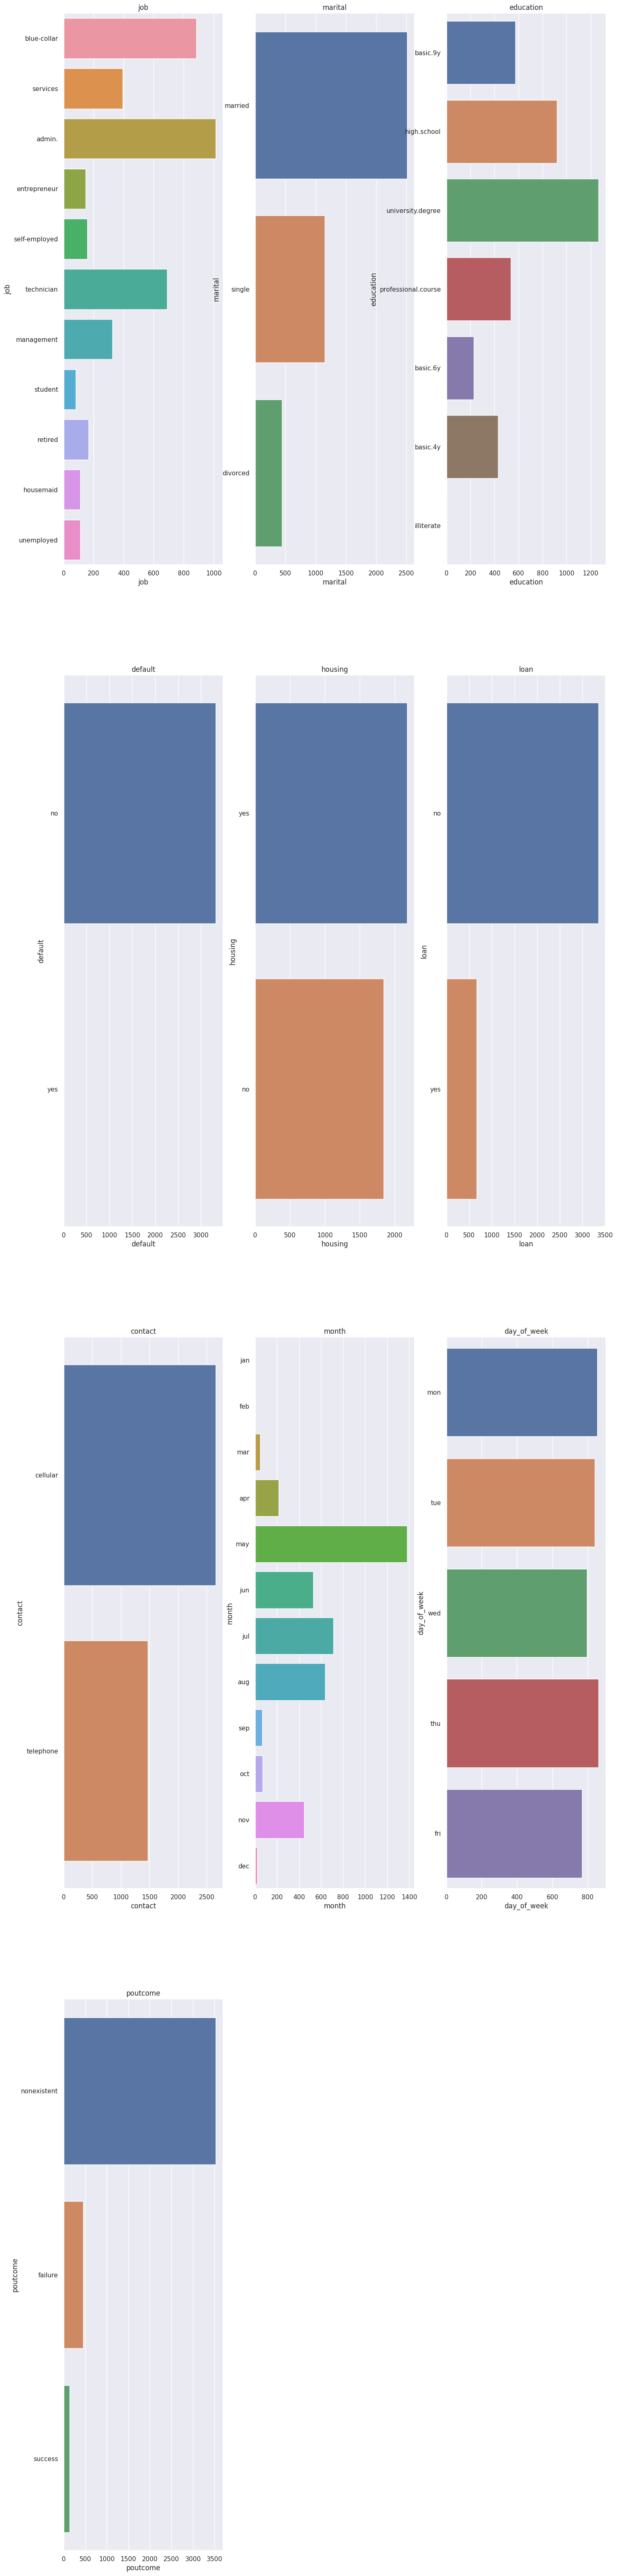

In [203]:
plt.figure(figsize=(17, 80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(4, 3, plotnumber)
    sns.countplot(y=categorical_feature, data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber += 1
plt.show()

### Sprawdzenie relacji między zmiennymi kategorycznymi oraz targetem za pomconą Information gain w decision tree

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

target_col = 'y'
target = df[target_col]

df_cat_feat = df[categorical_features]

df_encoded = pd.get_dummies(df_cat_feat, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')  # Information Gain criterion
clf.fit(X_train, y_train)

# Get feature importances (information gain)
feature_importance = clf.feature_importances_

# Create a dictionary mapping features to their importance
feature_importance_dict = dict(zip(df_encoded.columns, feature_importance))

# Sort the feature-importance dictionary by information gain
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Print the sorted feature-importance pairs
for feature, info_gain in sorted_feature_importance.items():
    print(f"Feature: {feature}, Information Gain: {info_gain:.4f}")

Feature: poutcome_success, Information Gain: 0.1044
Feature: housing_yes, Information Gain: 0.0719
Feature: loan_yes, Information Gain: 0.0565
Feature: day_of_week_wed, Information Gain: 0.0476
Feature: day_of_week_thu, Information Gain: 0.0404
Feature: day_of_week_fri, Information Gain: 0.0384
Feature: marital_single, Information Gain: 0.0384
Feature: job_technician, Information Gain: 0.0383
Feature: day_of_week_tue, Information Gain: 0.0370
Feature: education_university.degree, Information Gain: 0.0335
Feature: job_management, Information Gain: 0.0304
Feature: month_jun, Information Gain: 0.0298
Feature: month_may, Information Gain: 0.0293
Feature: education_high.school, Information Gain: 0.0292
Feature: marital_married, Information Gain: 0.0279
Feature: contact_telephone, Information Gain: 0.0276
Feature: month_nov, Information Gain: 0.0262
Feature: month_aug, Information Gain: 0.0259
Feature: month_jul, Information Gain: 0.0250
Feature: poutcome_nonexistent, Information Gain: 0.023

In summary, the results suggest that 'poutcome_success',  certain day-of-the-week, housing-related, loan features are the most influential in predicting the target variable 'y'.It is possible to use this information to prioritize feature selection or further investigate the relationships between these features and the target variable in your dataset.

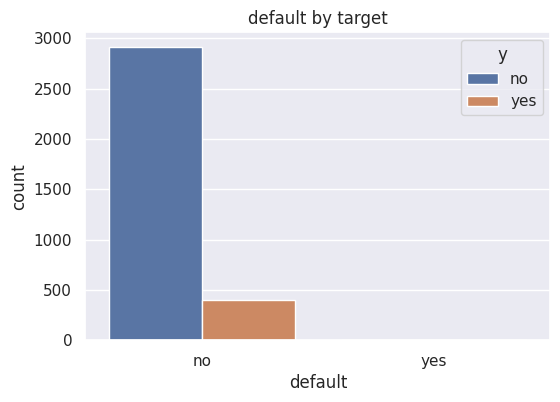

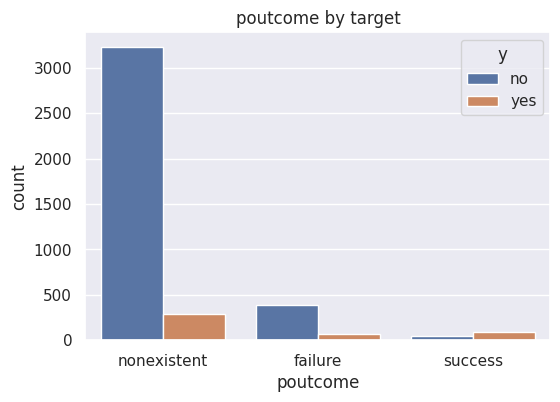

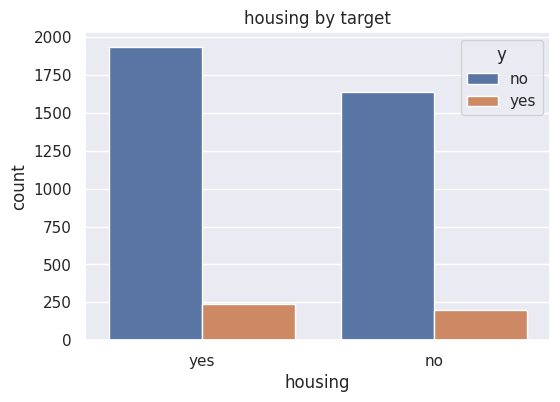

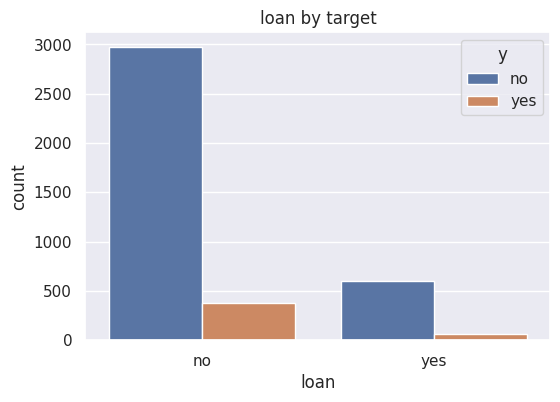

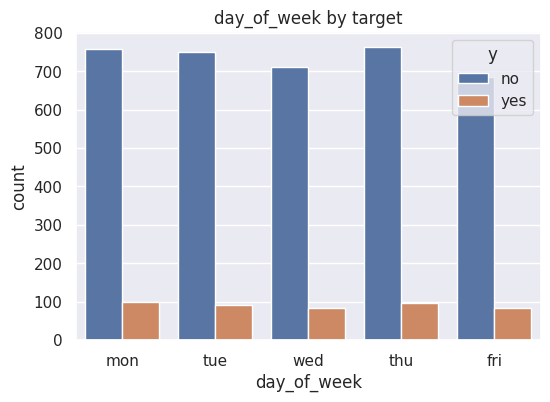

In [205]:
cat_features_vis = ['default', 'poutcome', 'housing', 'loan', 'day_of_week']

for f in cat_features_vis:
  plt.figure(figsize=(6, 4), facecolor='white')
  sns.countplot(x=f, hue='y', data=df)
  print()
  plt.title(f'{f} by target')

## analiza współczynników ek emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed' - zmiana

zmiana wartości euribor na koszyki

In [206]:
# Calculate the minimum and maximum values from the DataFrame
min_value_eur = df['euribor3m'].min()
max_value_eur = df['euribor3m'].max()

# Define the bin width
bin_width = 0.5

# # Create a list of bin edges (start, stop, and step)
# bins = [x for x in range(int(min_value_eur), int(max_value_eur) + 1, int(bin_width))]

# # Create a new column with the bin labels
# df['euribor3m_binned'] = pd.cut(df['euribor3m'], bins=bins, labels=bins[:-1])

# Create a list of bin edges (start, stop, and step) using numpy.arange
bins = np.arange(int(min_value_eur), int(max_value_eur) + bin_width, bin_width)

bins = np.linspace(int(min_value_eur), max_value_eur, num_bins + 1)

# Create a new column with the bin labels
df['euribor3m_binned'] = pd.cut(df['euribor3m'], bins=bins, labels=bins[:-1])

In [207]:
print(df['euribor3m_binned'])
print(df['euribor3m'])

0       1.009000
1       4.708667
2       4.708667
3       4.708667
4       4.036000
          ...   
4114    4.708667
4115    4.708667
4116    1.345333
4117    4.708667
4118    4.036000
Name: euribor3m_binned, Length: 4119, dtype: category
Categories (15, float64): [0.000000 < 0.336333 < 0.672667 < 1.009000 ... 3.699667 < 4.036000 < 4.372333 <
                           4.708667]
0       1.313
1       4.855
2       4.962
3       4.959
4       4.191
        ...  
4114    4.958
4115    4.959
4116    1.354
4117    4.966
4118    4.120
Name: euribor3m, Length: 4119, dtype: float64


In [208]:
len(df['euribor3m_binned'].unique())

10

In [209]:
numerical_features.append('euribor3m_binned')

In [210]:
for column in df[numerical_features]:
    unique_values = df[column].unique()
    print(f"Unique values in column {column}: {', '.join(map(str, unique_values))}")

Unique values in column age: 30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55, 40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54, 59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64, 74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70
Unique values in column duration: 487, 346, 227, 17, 58, 128, 290, 44, 68, 170, 301, 148, 97, 211, 553, 698, 191, 59, 38, 849, 326, 222, 626, 119, 388, 479, 446, 127, 109, 113, 393, 151, 256, 42, 525, 57, 499, 84, 137, 31, 430, 126, 340, 412, 132, 79, 341, 157, 252, 263, 215, 89, 143, 40, 10, 481, 233, 204, 403, 180, 16, 447, 81, 361, 1091, 395, 432, 596, 77, 768, 96, 357, 459, 11, 264, 93, 374, 158, 95, 835, 505, 300, 390, 274, 135, 257, 268, 477, 91, 76, 103, 436, 483, 250, 259, 389, 7, 123, 92, 297, 406, 104, 854, 147, 203, 149, 144, 394, 523, 73, 197, 108, 80, 114, 122, 1161, 181, 239, 360, 314, 984, 663, 141, 706, 797, 311, 63, 111, 49, 171, 242, 279, 246, 309, 168, 153, 152, 90, 117, 640, 

In [211]:
columns_coeff = ['emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed', 'euribor3m_binned']

value_mappings = {}

for column in df[columns_coeff]:
    unique_values = df[column].unique()
    value_mapping = {value: i + 1 for i, value in enumerate(unique_values)}
    value_mappings[column] = value_mapping

for column in df[columns_coeff]:
    new_column_name = f"{column}_updated"
    df[new_column_name] = df[column].map(value_mappings[column])

print(df)

      age          job  marital          education default housing loan  \
0      30  blue-collar  married           basic.9y      no     yes   no   
1      39     services   single        high.school      no      no   no   
2      25     services  married        high.school      no     yes   no   
3      38     services  married           basic.9y      no     NaN  NaN   
4      47       admin.  married  university.degree      no     yes   no   
...   ...          ...      ...                ...     ...     ...  ...   
4114   30       admin.  married           basic.6y      no     yes  yes   
4115   39       admin.  married        high.school      no     yes   no   
4116   27      student   single        high.school      no      no   no   
4117   58       admin.  married        high.school      no      no   no   
4118   34   management   single        high.school      no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
0      cellular   may    

In [212]:
# znalezenie theM

# Data Preprocessing

## Wartości null

In [213]:
# Łącznie mamy 1029 wierszy z wartościami null (niektóre w kilku kolumnach)
# Dla 5 kolumn kategorycznych  wartości nulls są zdecydowaną mniejszością (od 1% od 4% wierszy) - dla nich uzupełnię nulle wartością najczęście spotykaną
# dla Kolumny 'default' aż 803 rekordy (19%) stanowią wartości null - z uwagi na to, przekształcę nulls jako odrębną wartość ('unknown')

In [214]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['job'].mode()[0], inplace=True)
df['housing'].fillna(df['job'].mode()[0], inplace=True)
df['loan'].fillna(df['job'].mode()[0], inplace=True)

In [215]:
df['default'].fillna('unknown', inplace=True)

In [312]:
df.isnull().sum()

age                         0
job                         0
marital                     0
education                   0
default                     0
housing                     0
loan                        0
contact                     0
month                       0
day_of_week                 0
duration                    0
campaign                    0
pdays                       0
previous                    0
poutcome                    0
emp.var.rate                0
cons.price.idx              0
cons.conf.idx               0
euribor3m                   0
nr.employed                 0
y                           0
duration_category           0
y_numeric                   0
month_numeric               0
euribor3m_binned            0
emp.var.rate_updated        0
cons.price.idx_updated      0
cons.conf.idx_updated       0
euribor3m_updated           0
nr.employed_updated         0
euribor3m_binned_updated    0
dtype: int64

In [217]:
df['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       4119 non-null   int64   
 1   job                       4119 non-null   object  
 2   marital                   4119 non-null   object  
 3   education                 4119 non-null   object  
 4   default                   4119 non-null   object  
 5   housing                   4119 non-null   object  
 6   loan                      4119 non-null   object  
 7   contact                   4119 non-null   object  
 8   month                     4119 non-null   category
 9   day_of_week               4119 non-null   category
 10  duration                  4119 non-null   int64   
 11  campaign                  4119 non-null   int64   
 12  pdays                     4119 non-null   int64   
 13  previous                  4119 non-null   int64 

## Zmiana struktury kolumn

In [219]:
# wcześniej została utworozna kolumna 'duration_category', żeby przeciwdziałać outliarom, być może kolumna 'age' to samo / ??

#Modelowanie

## Podział danych na zbiór treningowy i testowy

In [220]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category,y_numeric,month_numeric,euribor3m_binned,emp.var.rate_updated,cons.price.idx_updated,cons.conf.idx_updated,euribor3m_updated,nr.employed_updated,euribor3m_binned_updated
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,13,0,5,1.009000,1,1,1,1,1,1.0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,11,0,5,4.708667,2,2,2,2,2,2.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,9,0,6,4.708667,3,3,3,3,3,2.0
3,38,services,married,basic.9y,no,admin.,admin.,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0,6,4.708667,3,3,3,4,3,2.0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0,11,4.036000,4,4,4,5,4,3.0


In [221]:
data = df.copy()

In [222]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'duration_category',
       'y_numeric', 'month_numeric', 'euribor3m_binned',
       'emp.var.rate_updated', 'cons.price.idx_updated',
       'cons.conf.idx_updated', 'euribor3m_updated', 'nr.employed_updated',
       'euribor3m_binned_updated'],
      dtype='object')

In [290]:
model_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_numeric']

print(len(model_columns))
print(model_columns)

20
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_numeric']


In [291]:
data = df[model_columns]
y = data.pop('y_numeric')
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_numeric, Length: 4119, dtype: int64

In [292]:
X = data
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,admin.,admin.,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [293]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   int64   
 1   job             4119 non-null   object  
 2   marital         4119 non-null   object  
 3   education       4119 non-null   object  
 4   default         4119 non-null   object  
 5   housing         4119 non-null   object  
 6   loan            4119 non-null   object  
 7   contact         4119 non-null   object  
 8   month           4119 non-null   category
 9   day_of_week     4119 non-null   category
 10  campaign        4119 non-null   int64   
 11  pdays           4119 non-null   int64   
 12  previous        4119 non-null   int64   
 13  poutcome        4119 non-null   object  
 14  emp.var.rate    4119 non-null   float64 
 15  cons.price.idx  4119 non-null   float64 
 16  cons.conf.idx   4119 non-null   float64 
 17  euribor3m     

Przy liście zmiennych pomijamy zmienną 'duration' - specyfika tej zmiennej jest taka, nie będziemy wiedzieli przed wykonaniem konaktu, jak długo potrwa (Nie będzie dostępna w danych produkcyjnych)

In [313]:
num_feat=['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

cat_feat=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

ord_feat=['month', 'day_of_week']

print(f'No. of numerical features: {len(num_feat)}')
print(num_feat)
print()
print(f'No. of categorical features: {len(cat_feat)}')
print(cat_feat)
print()
print(f'No. of ordinal features: {len(ord_feat)}')
print(ord_feat)

No. of numerical features: 9
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

No. of categorical features: 8
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 2
['month', 'day_of_week']


In [314]:
seed = 23

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [316]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3295, 19), (3295,), (824, 19), (824,))

## Model baseline - DecisionTreeClassifier

In [ ]:
# num_transformer = Pipeline(steps=[
#     ('passtrough', SimpleImputer(strategy='median'))
# ])

In [329]:
from sklearn.preprocessing import LabelEncoder

In [333]:
# num_transformer = Pipeline(steps=[
#     ('passtrough', SimpleImputer(strategy='median'))
# ])

TypeError: ignored

In [ ]:
feature_importance = decision_tree.feature_importances_
all_column_names = X_train.columns

importance_tuples = [(col, imp) for col, imp in zip(all_column_names, feature_importance)]

# Sort the list by feature importance in descending order
sorted_importance = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

# Print feature importance values for each column in descending order
for column, importance in sorted_importance:
    print(f"{column}: {importance}")

Zauważamy, że wpłwy mają kolumny:

emp.var.rate: 0.043453683463770675

poutcome: 0.028185955393953323

age: 0.027120710437577383

cons.price.idx: 0.02059899770434161

default: 0.020113591987806455

job: 0.020013074405669528

contact: 0.01838826654457866

previous: 0.01703695338912337

housing: 0.016211193331433584

day_of_week: 0.014794366659273432

nr.employed: 0.012066372145879087

cons.conf.idx: 0.011891082966609668

campaign: 0.011068545060035176